In [1]:
from sphedron import Icosphere, UniformMesh
from sphedron.transfer import MeshTransfer
from sphedron.extra import get_mesh_landmask
from sphedron.extra import plot_2d_mesh
import matplotlib.pyplot as plt
import numpy as np

In [2]:
factor = 32
ico_mesh = Icosphere(refine_factor=factor)
uni_mesh = UniformMesh(resolution=1)

print(ico_mesh)
print(uni_mesh)

Mesh has: #nodes: 10242
          #faces: 20480
          #edges: 61440
          #edges_unique: 30720
          metadata: {'factor': 32}
Mesh has: #nodes: 65160
          #faces: 65160
          #edges: 195480
          #edges_unique: 65160
          metadata: {}


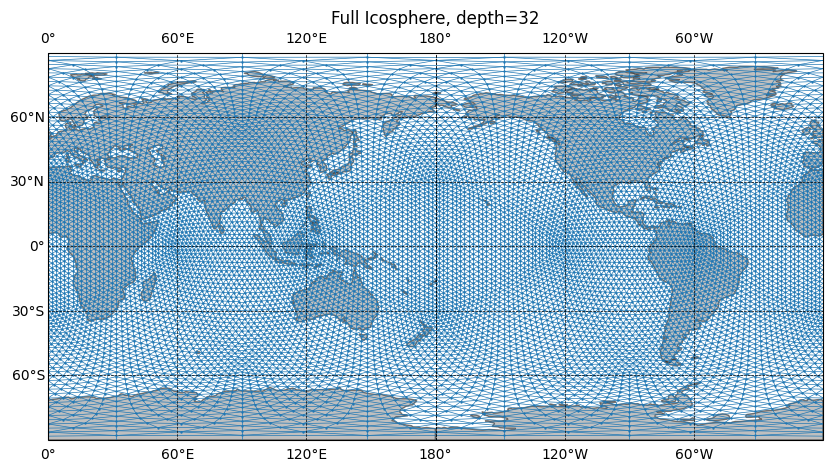

In [3]:
plot_2d_mesh(
    ico_mesh,
    title=f"Full Icosphere, depth={ico_mesh.metadata['factor']}",
    scatter=True,
    s=0.5,
)

In [4]:
ico_land_mask = get_mesh_landmask(ico_mesh)
ico_mesh.mask_nodes(ico_land_mask)

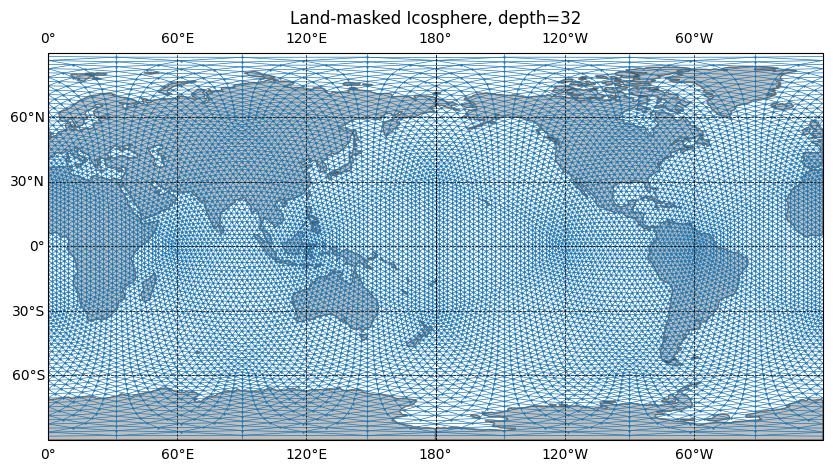

In [4]:
plot_2d_mesh(
    ico_mesh,
    title=f"Land-masked Icosphere, depth={ico_mesh.metadata['factor']}",
    scatter=True,
    s=0.5,
)

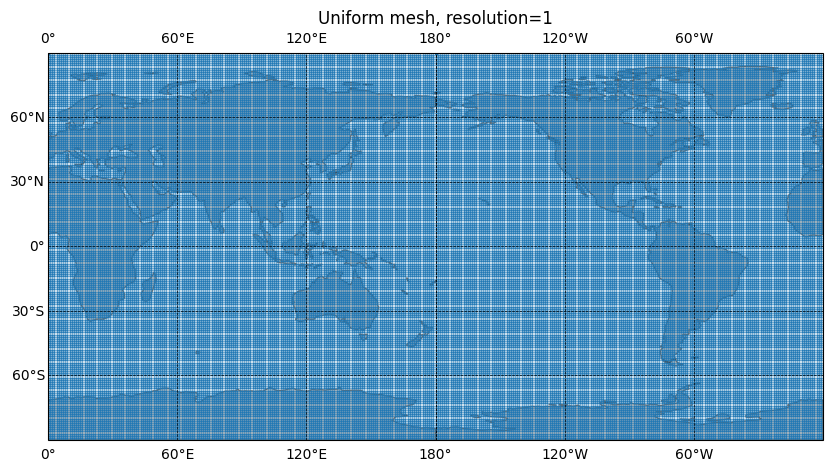

In [5]:
plot_2d_mesh(
    uni_mesh,
    title=f"Uniform mesh, resolution={uni_mesh.resolution}",
    scatter=True,
    s=0.5,
)

The mesh nodes are in xyz, let's create a test map where the values are |x|.

In [6]:
ico_values = np.abs(ico_mesh.nodes[:,0])

Now we want to transfer this map to the uniform mesh. We'll use a nearest neighbor transfer, where the value at each uniform node is the average of its 3 nearest nodes from the icosphere. MeshTransfer will only compute the neighbors once.

In [7]:
transfer = MeshTransfer(ico_mesh, uni_mesh, n_neighbors=5)

In [12]:
uniform_values = transfer.transfer(ico_values)

In [13]:
def weighted_func(w):
    min_w = np.min(w,axis=-1,keepdims=True) + 1e-10
    weights =  np.exp(-(w/min_w)**2/2)
    return weights / np.sum(weights, axis=-1, keepdims=True)

In [14]:
w_uni_values = transfer.weighted_transfer(ico_values,weight_func=weighted_func)

The uniform values are flattened, we can reshape them as follows to get a 2D arrray:

In [15]:
uniform_values = uni_mesh.reshape(uniform_values)
w_uni_values = uni_mesh.reshape(w_uni_values)

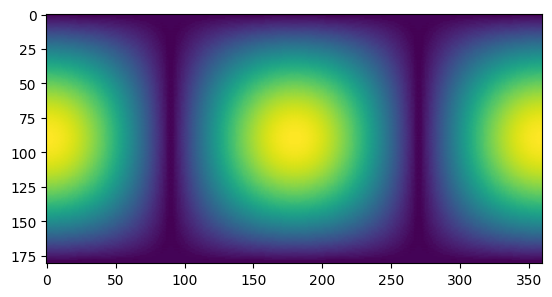

In [16]:
plt.imshow(uniform_values[::-1])

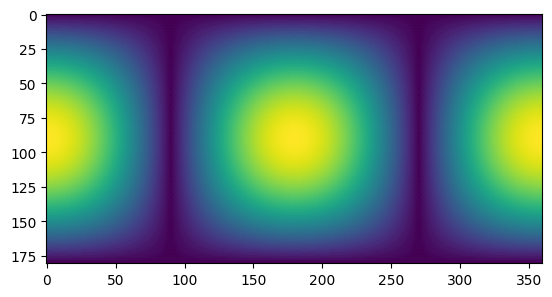

In [17]:
plt.imshow(w_uni_values[::-1])

Let's now mask land on the uniform mesh as well: first we compute the mask, then reshape it

In [18]:
uniform_mask = uni_mesh.reshape(get_mesh_landmask(uni_mesh))

In [19]:
uniform_values[uniform_mask] = -0.2

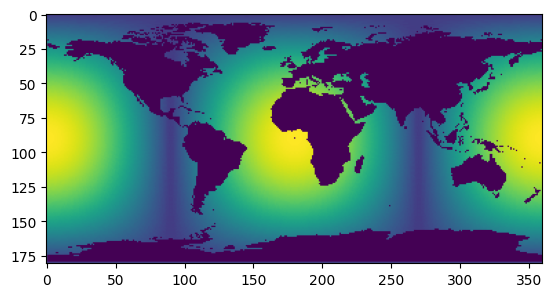

In [20]:
plt.imshow(uniform_values[::-1])

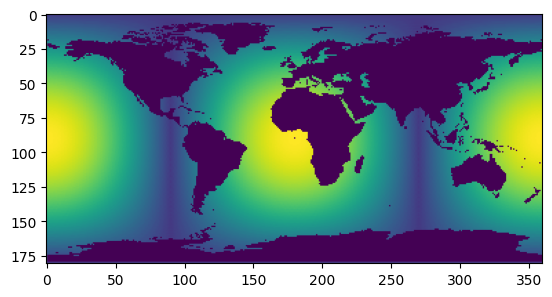

In [21]:
w_uni_values[uniform_mask] = -0.2
plt.imshow(w_uni_values[::-1])